# *Analiza nesreća prouzrokovanih vatrenim oružjem*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()
import datetime as dt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio

In [25]:
df = pd.read_csv('C:\\Users\\kosta\\gun_violence.csv')
df.sample(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
234646,1059523,2018-02-27,Tennessee,Memphis,5490 Fog Hollow Ln,0,2,http://www.gunviolencearchive.org/incident/105...,http://www.wmcactionnews5.com/story/37610874/2...,False,...,NaN,0::Adult 18+||1::Adult 18+,0::Male||1::Male,NaN,NaN,0::Injured||1::Injured,0::Victim||1::Victim,http://www.wmcactionnews5.com/story/37610874/2...,85.0,33.0
105773,476374,2016-01-01,Florida,Orlando,800 block of South Kirkman Road,0,1,http://www.gunviolencearchive.org/incident/476374,http://www.orlandosentinel.com/news/breaking-n...,False,...,0::9,0::Child 0-11,0::Female,NaN,NaN,0::Injured,0::Victim,http://www.orlandosentinel.com/news/breaking-n...,46.0,12.0
15297,131393,2014-05-01,Minnesota,Minneapolis,Riverside Avenue and 20th Avenue South,0,0,http://www.gunviolencearchive.org/incident/131393,http://minnesota.cbslocal.com/2014/05/02/u-iss...,False,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,1::Male||2::Male||3::Male,NaN,NaN,0::Unharmed||1::Unharmed||2::Unharmed||3::Unha...,0::Victim||1::Subject-Suspect||2::Subject-Susp...,http://minnesota.cbslocal.com/2014/05/02/u-iss...,NaN,60.0
31909,176106,2014-08-16,Tennessee,Jackson,Lexington and Boone St,0,1,http://www.gunviolencearchive.org/incident/176106,http://www.jacksonsun.com/story/news/crime/201...,False,...,NaN,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.jacksonsun.com/story/news/crime/201...,80.0,27.0
88019,407945,2015-09-03,Georgia,Newnan,48 Glenn Street,1,0,http://www.gunviolencearchive.org/incident/407945,http://www.times-herald.com/local/20150804-sho...,False,...,0::33,0::Adult 18+,0::Male,0::Emilio Sanchez-Martinez,NaN,0::Killed,0::Victim,http://www.times-herald.com/local/20150804-sho...,132.0,28.0


In [64]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,godina,povredjeni
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,239677.000000,239677.000000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,2015.711629,0.746296
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,1.225870,0.842343
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,2013.000000,0.000000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,2015.000000,0.000000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,2016.000000,1.000000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,2017.000000,1.000000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,2018.000000,103.000000


#### Izbacivanje kolona koje mi za ovu analizu nisu potrebne:

In [31]:
df.drop(columns=['incident_url', 'source_url','incident_url_fields_missing','sources','state_house_district','state_senate_district'],inplace= True)

In [32]:
# menjanje kolone u odgovarajuci date format kako bi bila upotrebljiva
df['date'] = pd.to_datetime(df['date'])

In [33]:
df['godina'] = df['date'].dt.year
df['godina']

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
239672    2018
239673    2018
239674    2018
239675    2018
239676    2018
Name: godina, Length: 239677, dtype: int64

In [34]:
# pronalazenje procenta vrednosti koje nedostaju po kolonama

missing = df.isna().sum() / len(df) * 100
missing_value_df = pd.DataFrame({'percent_missing': missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,percent_missing
participant_relationship,93.418643
location_description,82.439283
participant_name,51.007397
gun_stolen,41.513370
gun_type,41.493760
n_guns_involved,41.493760
participant_age,38.509327
notes,33.802576
participant_age_group,17.573234
participant_gender,15.171251


In [8]:
df.state.value_counts().head(25).iplot(kind = 'bar', theme='solar', title = 'NESRECE PO STATE-OVIMA',)

In [9]:
df.city_or_county.value_counts().head(10).iplot(kind = 'bar', theme = 'polar', title = 'Nesrece po gradovima', xTitle='Grad')

* Top 5 gradova po nesrecama
    * Cikago 
    * Baltimor
    * Vasington
    * Novi Orleans
    * Filadelfija

In [10]:
dani = df['date'].value_counts().head(3)
pd.DataFrame(dani)

,date
2017-01-01,342
2017-07-04,248
2018-01-01,242


* ####  po ovome vidimo da su najopasniji datumi upravo praznici, 1. januar (Nova Godina) i 4. jul (americki dan nezavisnosti)


In [15]:
broj_oruzja = df['n_guns_involved'].dropna().apply(lambda x: '4+' if x > 4 else float(x)) 
broj_oruzja = broj_oruzja.value_counts()
data = pd.DataFrame({'labels': broj_oruzja.index,
                   'values': broj_oruzja.values
                  })
data.iplot(kind='pie',labels='labels',values='values', title='Raspodela broja oruzja ukljucenih u incident ')

* #### po ovome jasno vidimo da je velika vecina nesreca jednostrana, odnosno da je korisceno samo 1 oruzje. Ocigledno je da nam treba jos oruzja kako bi ljudi mogli da se brane.  

In [21]:
bande = df.loc[(df['n_guns_involved'] >= 200)]
bande_df = bande['city_or_county'].value_counts().head(5)
pd.DataFrame(bande_df)

,city_or_county
Los Angeles,3
Anaheim,3
Orlando,2
Salem,1
Van Nuys,1


* #### Gradovi i broj nesreca u koje je bilo ukljuceno vise od 200 oruzja. Treba dalje istraziti da li je to delo aktivnih bandi iz tih gradova. 

<AxesSubplot:xlabel='godina'>

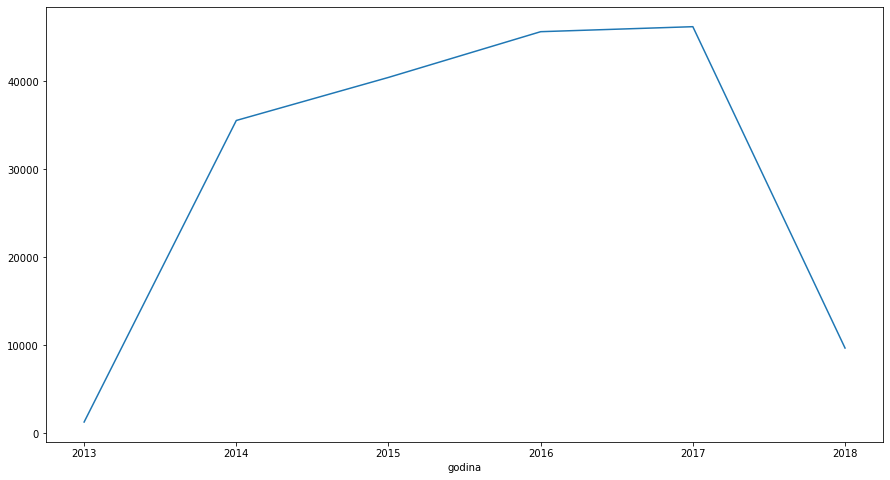

In [82]:
df['povredjeni'] = df['n_injured'] + df['n_killed']

po_godinama = df['povredjeni'].groupby(by=df["godina"]).sum()
po_godinama
po_godinama.plot(figsize=(15,8))

* #### Gornji plot ne prikazuje opadanje trenda nasilja vec podaci idu samo do marta 2018. godine

In [83]:
item=df['state'].value_counts().head(30).index.tolist()
item_size=df['state'].value_counts().head(30).values.tolist()

cities = []
scale = 250


for i in range(len(item)):
    lim = item[i]
    df_sub = df.loc[df['state']==lim][:1]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = item[i] + '<br>Gun abuse ' + str(item_size[i]),
        marker = dict(
            size = item_size[i]/scale,
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = lim )
    cities.append(city)

layout = dict(
        title = 'Interaktivna mapa',
        
        geo = dict(
            scope='usa',
            projection=dict( type='miller usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )
plt.savefig('abc.png')   

<Figure size 432x288 with 0 Axes>